# Subgraph

In [2]:
import json
import os
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from scipy.stats import norm

graph = nx.Graph()
with open('data/edge_list.txt') as f:
    for line in f:
        a, b, c = line.strip().split()
        graph.add_node(int(a))
        if int(c)>100:
            graph.add_edge(int(a), int(b), weight = int(c))

with open('json/idAndName.json') as json_file:
    idAndName = json.load(json_file)
    
with open('json/top_game.json') as json_file:
    topGameStreamer = json.load(json_file)

with open('json/channels_name_flw.json') as json_file:
    channels_name_flw = json.load(json_file)
    
for i in range(500):
    graph.nodes[int(idAndName[i]['id'])]['name'] = idAndName[i]['name']
    graph.nodes[int(idAndName[i]['id'])]['followers'] = int(channels_name_flw[i]['followers'].replace(",", ""))
    graph.nodes[int(idAndName[i]['id'])]['top_category'] = topGameStreamer[i]['top_game']
    
nx.write_gexf(graph, "data/twitch_subgraph.gexf")

In [2]:
def returnNodeById(g, id_):
    for x, y in g.nodes().data():
        if x == id_:
            return(y)
        
def returnNodeByName(g, names):
    for x, y in g.nodes().data():
        if y['name'] in names:
            print(x, y)
            
def returnEdgeByNames(g, name1, name2):
    for y, x in g.nodes().data():
        if x['name'] == name1:
            for i, j in g.nodes().data():
                if j['name'] == name2:
                    print(name1, name2, graph.get_edge_data(y, i))

In [3]:
print('Number of nodes: {}'.format(graph.order()))
print('Number of links: {}'.format(graph.size()))

Number of nodes: 500
Number of links: 3216


In [4]:
density = nx.density(graph)
print('Density: {}'.format(density))

Density: 0.025779559118236473


## Degree analysis

In [5]:
degree = list(dict(graph.degree()).values())

In [6]:
# Degree analysis

print('Mean degree: {}'.format(np.mean(degree)))
print('Standard deviation: {}'.format(np.std(degree)))
print('Median: {}'.format(np.median(degree)))
print('Min: {}'.format(np.min(degree)))
print('Max: {}'.format(np.max(degree)))

Mean degree: 12.864
Standard deviation: 9.14294832097393
Median: 12.5
Min: 0
Max: 41


## ECDF and ECCDF in linear and logscale

Text(0, 0.5, 'ECDF Twitch')

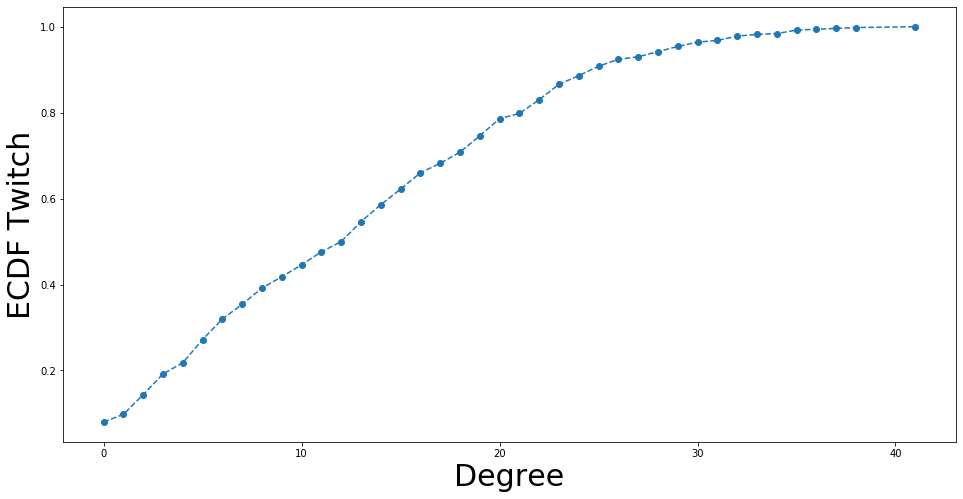

In [7]:
# ECDF linear scale
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(16,8))
axes = fig_cdf.gca()
axes.plot(x,y,marker='o',ms=6, linestyle='--')
axes.set_xlabel('Degree', size=30)
axes.set_ylabel('ECDF Twitch', size=30)

Text(0, 0.5, 'ECCDF Twitch')

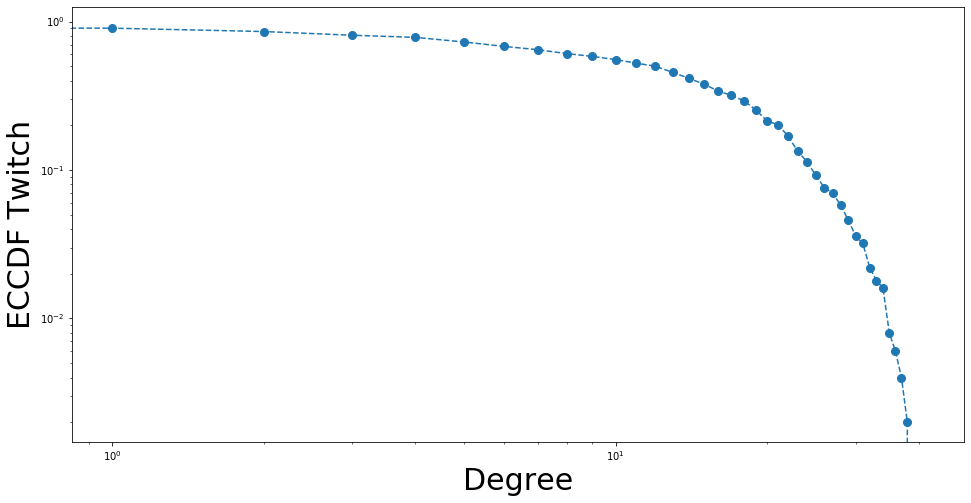

In [8]:
# ECCDF
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(16,8))
axes = fig_cdf.gca()
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree', size=30)
axes.set_ylabel('ECCDF Twitch', size = 30)

## Follower-Degree relationship

Text(0, 0.5, 'Degree')

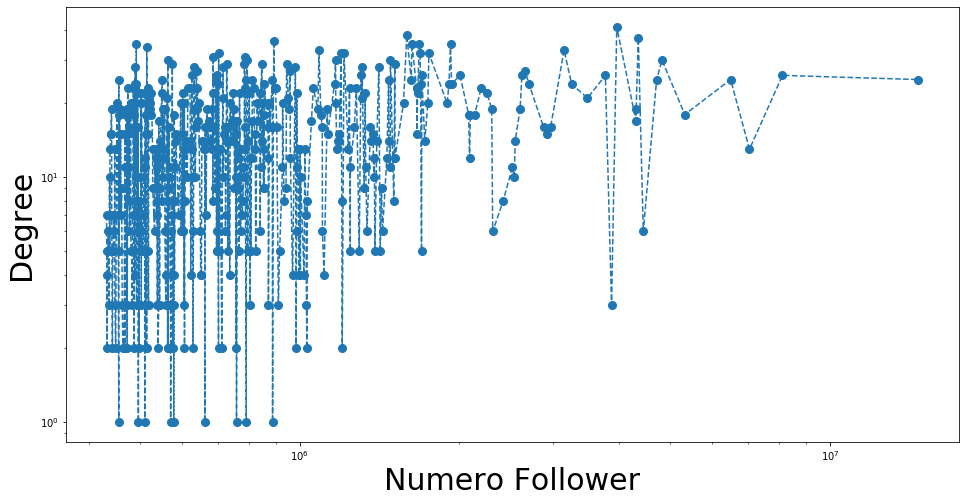

In [4]:
from operator import itemgetter

followers = []
for x, y in list(graph.nodes.data()):
    followers.append((y['followers'], graph.degree(x)))

followers.sort(key=itemgetter(0))

x = []
y = []
for i in followers:
    if i[1]!=0:
        x.append(i[0])
        y.append(i[1])

fig_cdf = plt.figure(figsize=(16,8))
axes = fig_cdf.gca()
axes.loglog(x, y, marker='o', ms=8, linestyle='--')
axes.set_xlabel('Numero Follower', size=30)
axes.set_ylabel('Degree', size = 30)

## Pearson correlation coefficient

In [6]:
print(scipy.stats.pearsonr(x, y)[0])

0.2727455396605806


## Connectivity

In [12]:
print(nx.is_connected(graph))
print(nx.number_connected_components(graph))

False
44


In [17]:
print([len(c) for c in sorted(nx.connected_components(graph), key=len, reverse=True)])

[452, 4, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


## Isolates

In [10]:
print(len(list(nx.isolates(graph))))

40


In [11]:
isolates_category = []
for x in list(nx.isolates(graph)):
    node = returnNodeById(graph, x)
    print(node)
    isolates_category.append(node['top_category'])
    
print(isolates_category)
from collections import Counter
Counter(isolates_category)

{'name': 'Fortnite', 'followers': 2889725, 'top_category': 'Fortnite'}
{'name': 'OverwatchLeague', 'followers': 1813999, 'top_category': 'Overwatch'}
{'name': 'BobRoss', 'followers': 1476417, 'top_category': 'Art'}
{'name': 'RocketLeague', 'followers': 1371187, 'top_category': 'Rocket League'}
{'name': 'Warframe', 'followers': 1084565, 'top_category': 'Warframe'}
{'name': 'Call of Duty', 'followers': 975653, 'top_category': 'Call of Duty: Black Ops 4'}
{'name': 'LoganPaulWasTaken', 'followers': 823198, 'top_category': 'Fortnite'}
{'name': 'MLG_Live', 'followers': 822493, 'top_category': 'Just Chatting'}
{'name': 'KYR_SP33DY', 'followers': 698401, 'top_category': 'Minecraft'}
{'name': 'HRKChannel', 'followers': 694565, 'top_category': "PLAYERUNKNOWN'S BATTLEGROUNDS"}
{'name': 'Kitboga', 'followers': 682148, 'top_category': 'IRL'}
{'name': 'battlegroundsgame', 'followers': 631656, 'top_category': 'Just Chatting'}
{'name': 'nickbunyun', 'followers': 627988, 'top_category': 'Counter-Strike

Counter({'Fortnite': 3,
         'Overwatch': 2,
         'Art': 1,
         'Rocket League': 1,
         'Warframe': 1,
         'Call of Duty: Black Ops 4': 1,
         'Just Chatting': 12,
         'Minecraft': 2,
         "PLAYERUNKNOWN'S BATTLEGROUNDS": 1,
         'IRL': 2,
         'Counter-Strike: Global Offensive': 1,
         'Call of Duty: Black Ops III': 1,
         'Pokémon Sword/Shield': 2,
         'League of Legends': 2,
         'Call of Duty: WWII': 1,
         'Dead by Daylight': 2,
         'Far Cry 5': 1,
         'Smite': 1,
         'Talk Shows & Podcasts': 2,
         'iRacing.com': 1})

452


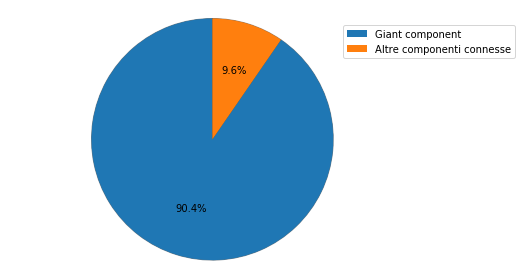

In [19]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Giant component', 'Altre componenti connesse'
print(len(max(nx.connected_components(graph), key=len)))
giant = len(max(nx.connected_components(graph), key=len))/500
sizes = giant, 1-giant
fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%', shadow=True, startangle=90, radius=3000)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()

# Put a legend to the right of the current axis
plt.legend(labels, loc="upper right", bbox_to_anchor=(1.25, 0.95))

plt.show()

## Categories pie chart

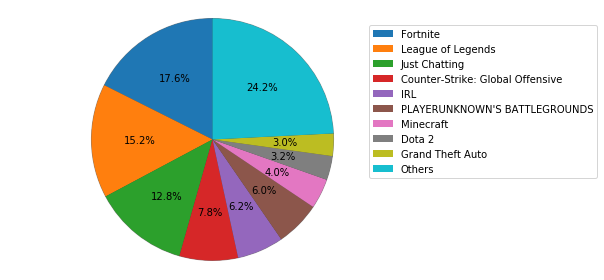

In [15]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Fortnite', 'League of Legends', 'Just Chatting', 'Counter-Strike: Global Offensive', 'IRL', "PLAYERUNKNOWN'S BATTLEGROUNDS", 'Minecraft', 'Dota 2', 'Grand Theft Auto', 'Others'
sizes = [17.6, 15.2, 12.8, 7.8, 6.2, 6, 4, 3.2, 3]
others = 100 - sum(sizes)
sizes.append(others)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, autopct='%1.1f%%', shadow=True, startangle=90, radius=3000)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.tight_layout()

# Put a legend to the right of the current axis
plt.legend(labels, loc="upper right", bbox_to_anchor=(1.45, 0.95))

plt.show()

## Assortatività

In [23]:
print(nx.attribute_assortativity_coefficient(graph,'top_category'))

0.3936559939031333
